***FINA 6339 \
Homework 2\
Xingzhi Mei***

In [15]:
# ALL Import Needed
import math as m
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm #pip install statsmodels --upgrade 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats import norm
import pandas_datareader.data as web
import arch as arch
from arch import arch_model

### A1:

In [2]:
# A1
# AAPL
print('AAPL:')
aapl = pd.read_csv("AAPL.csv")
returns_aapl = aapl['Adj Close'].pct_change().dropna()
print(returns_aapl.describe())
from scipy.stats import skew
skw_a = skew(returns_aapl)
print("skewnwss is "+ str(skw_a))
# kurtosis
from scipy.stats import kurtosis
kur_a = kurtosis(returns_aapl)
print("kurtosis is "+ str(kur_a))
# coefficient of variation  std/mean
cov_a = returns_aapl.describe()[2]/returns_aapl.describe()[1]
print("coefficient of variation is " + str(cov_a) +'\n')

# AMZN
print('AMZN:')
amzn = pd.read_csv("AMZN.csv")
returns_amzn = amzn['Adj Close'].pct_change().dropna()
print(returns_amzn.describe())
skw_am = skew(returns_amzn)
print("skewnwss is "+ str(skw_am))
# kurtosis
kur_am = kurtosis(returns_amzn)
print("kurtosis is "+ str(kur_am))
# coefficient of variation  std/mean
cov_am = returns_amzn.describe()[2]/returns_amzn.describe()[1]
print("coefficient of variation is " + str(cov_am) +'\n')


# MSFT
print('MSFT:')
msft = pd.read_csv("MSFT.csv")
returns_msft = msft['Adj Close'].pct_change().dropna()
print(returns_msft.describe())
skw_m = skew(returns_msft)
print("skewnwss is "+ str(skw_m))
# kurtosis
kur_m = kurtosis(returns_msft)
print("kurtosis is "+ str(kur_m))
# coefficient of variation  std/mean
cov_m = returns_msft.describe()[2]/returns_msft.describe()[1]
print("coefficient of variation is " + str(cov_m) +'\n')

AAPL:
count    264.000000
mean      -0.000695
std        0.022274
min       -0.058680
25%       -0.015332
50%       -0.000899
75%        0.013661
max        0.088975
Name: Adj Close, dtype: float64
skewnwss is 0.2790617215553262
kurtosis is 1.0071285501263514
coefficient of variation is -32.03679639591154

AMZN:
count    264.000000
mean      -0.001622
std        0.031371
min       -0.140494
25%       -0.019856
50%       -0.002319
75%        0.017757
max        0.135359
Name: Adj Close, dtype: float64
skewnwss is 0.22051884040683506
kurtosis is 2.8865587382076683
coefficient of variation is -19.342723632426846

MSFT:
count    264.000000
mean      -0.000938
std        0.022225
min       -0.077156
25%       -0.015236
50%       -0.001274
75%        0.012644
max        0.082268
Name: Adj Close, dtype: float64
skewnwss is 0.11544166766073105
kurtosis is 0.7813077585068546
coefficient of variation is -23.698692123794473



AAPL slope:  0.03303324571168845
AMZN slope:  0.04587754940078699
MSFT slope:  -0.018013699448521877


Text(0.5, 1.0, 'SML')

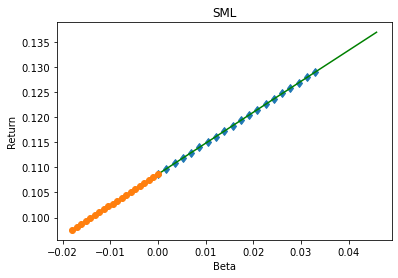

In [3]:
# SML
ff = pd.read_csv("factors.csv")
rf = ff['RF'].mean()
rp = ff['Mkt-RF'].mean()
sp = pd.read_csv("SP500.csv")
returns_sp = sp['Adj Close'].pct_change().dropna()
var_sp = returns_msft.describe()[2]**2

# aapl 
beta_aapl = np.cov(returns_aapl,returns_sp)/var_sp
print('AAPL slope: ',beta_aapl[0,1])
x1 = np.linspace(0,beta_aapl[0,1],20)
sml_aapl = rf + x1 * rp
plt.plot(x1,sml_aapl,'d')

#amzn
beta_amzn = np.cov(returns_amzn,returns_sp)/var_sp
print('AMZN slope: ',beta_amzn[0,1])
x2 = np.linspace(0,beta_amzn[0,1],20)
sml_amzn = rf + x2 * rp
plt.plot(x2,sml_amzn,'g')

#msft
beta_msft = np.cov(returns_msft,returns_sp)/var_sp
print('MSFT slope: ',beta_msft[0,1])
x3 = np.linspace(0,beta_msft[0,1],20)
sml_msft = rf + x3 * rp
plt.plot(x3,sml_msft,'o')
plt.xlabel("Beta")
plt.ylabel("Return")
plt.title("SML")

We see from the data summary that the returns of these three stocks are negative, means that AAPL, AMZN, MSFT are not competitive during the year of 2022 to 2023, they did not beat the market index. Investors and the agencies do not think much of they. Negative returns in year makes all factors that are calculate by mean to negative, negative cov indicate that these technology companies were spent more money to complete a task than was budgeted for the task. Apple are transfering their produce lines from China to other Asia counturies which takes more budgets and lack of the supply. Amzn are facing difficulties during the COVID that there are not enough workers in sorting center. MSFT facing the challenge of tiktok in advertisement, this affect company a lot that makes a negative beat of MSFT. The SML of the AAPL and AMZN are almost same as they are only a little difference in Slope.

### A2:

In [4]:
# Correlations
industry = pd.read_csv("5industry.csv")
print(industry.corr())

           Date     Cnsmr     Manuf     HiTec     Hlth      Other
Date   1.000000  0.917295  0.951129  0.869089  0.847503  0.897030
Cnsmr  0.917295  1.000000  0.946036  0.987246  0.882145  0.951790
Manuf  0.951129  0.946036  1.000000  0.903395  0.891073  0.936547
HiTec  0.869089  0.987246  0.903395  1.000000  0.833446  0.927270
Hlth   0.847503  0.882145  0.891073  0.833446  1.000000  0.910319
Other  0.897030  0.951790  0.936547  0.927270  0.910319  1.000000


In [5]:
model = sm.OLS(industry['Cnsmr'], ff[['Mkt-RF', 'SMB', 'HML', 'MOM']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Cnsmr   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              2.253
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0638
Time:                        12:38:08   Log-Likelihood:                         -2716.0
No. Observations:                 264   AIC:                                      5440.
Df Residuals:                     260   BIC:                                      5454.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF       303.3542    110.707      2.740      0.007      85.358     521.351
SMB          -70.7147    178.952     -0.395      0.693    -423.094     281.664
HML          135.1772    142.151      0.951      0.343    -144.736     415.090
MOM          190.3664     99.584      1.912      0.057      -5.728     386.460
==============================================================================
Omnibus:                       34.447   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.119
Skew:                           0.985   Prob(JB):                     2.63e-10
Kurtosis:                       3.360   Cond. No.                         2.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model = sm.OLS(industry['Manuf'], ff[['Mkt-RF', 'SMB', 'HML', 'MOM']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Manuf   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              2.214
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                      0.0678
Time:                        12:38:08   Log-Likelihood:                         -2677.7
No. Observations:                 264   AIC:                                      5363.
Df Residuals:                     260   BIC:                                      5378.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF       261.4075     95.766      2.730      0.007      72.831     449.984
SMB          -47.4278    154.801     -0.306      0.760    -352.251     257.395
HML           74.2262    122.966      0.604      0.547    -167.911     316.363
MOM          178.7099     86.145      2.075      0.039       9.080     348.340
==============================================================================
Omnibus:                        8.217   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.512
Skew:                           0.438   Prob(JB):                       0.0142
Kurtosis:                       2.925   Cond. No.                         2.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I choose Consumption and Manufactory becasue these two industry has a close relation. From the data we know that the consumption has exceed the supply for manufactory, the market is not at equilibrium. However, it will not affect the index a lot because their data is still close. their are lots of reason that may affect the supplys. these index shows that two industries do not generally follow the movements of the market index as they are in lower R-square, so they are kind far from the market line and they are not well fits in the distribution. But the high moment data indicate that these two inductries will increase overtime, people are long in these two inductries stocks. 

### B1:

Russell log return: -0.0006914065373623403
SP500 log return: 0.000669183168509421
Bitcoin log return: 0.001833537627823837


Text(0.5, 1.0, 'Log Return of SP500 & Russell')

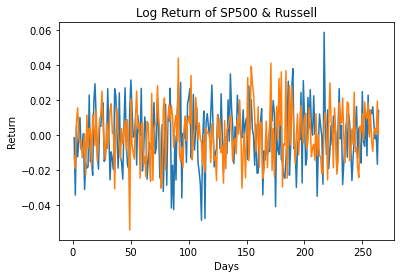

In [7]:
# Russell
russell = pd.read_csv("russell.csv")
russell_log_ret = np.log(russell['Adj Close']) - np.log(russell['Adj Close'].shift(1))
russell['Log return'] = russell_log_ret
print('Russell log return:',russell_log_ret.dropna().mean())

# SP500
sp_log_ret = np.log(sp['Adj Close']) - np.log(sp['Adj Close'].shift(1))
print('SP500 log return:',sp_log_ret.dropna().mean())

# Bitcoin
bitcoin = pd.read_csv("Bitcoin.csv")
bitcoin_log_ret = np.log(bitcoin['Close']) - np.log(bitcoin['Close'].shift(1))
bitcoin['Log return'] = bitcoin_log_ret
print('Bitcoin log return:',bitcoin_log_ret.dropna().mean())

# Market index
russell_log_ret.dropna().plot()
sp_log_ret.dropna().plot()
plt.xlabel("Days")
plt.ylabel("Return")
plt.title("Log Return of SP500 & Russell")

Text(0.5, 1.0, 'Log Return of Bitcoin')

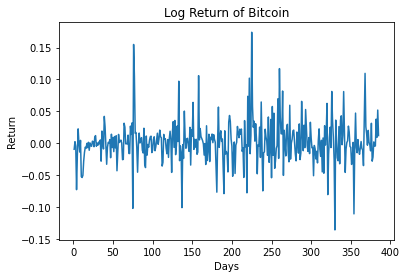

In [8]:
# High risk
bitcoin_log_ret.dropna().plot()
plt.xlabel("Days")
plt.ylabel("Return")
plt.title("Log Return of Bitcoin")

As we can see form two plot, the bitcoin is a really high risk investment object, the returns overdays are highly floating, investor can loss 30% of all the investment in one day and they might have additional 20% of the profit in one days. Bitcoin is for risk loving investors and its highly risky, but the bitcoin in 2022 to 2023 is relvently stable comparing to past few years. The advantage of Bitcoin is that its hard to track. Nobody knows who is making the order and the transactions do not require personal details or any sensitive information from either sender or receiver. The plot of market index indcicate the std is relvently close to its mean, there are not lots of floating in 2022 and they are two much safer investment objects comparing to the bitcoin. the market index investments are made for risk aversion investors. The S&P 500 5 Year Return is at 46.29%, which is better than many of other investment objects.

### B2:

ADF Statistic: -0.8597784051381374
p-value: 0.8009293414730867


/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  264
Model:                ARIMA(2, 2, 10)   Log Likelihood                 709.067
Date:                Sat, 04 Mar 2023   AIC                          -1392.134
Time:                        12:38:11   BIC                          -1345.746
Sample:                             0   HQIC                         -1373.489
                                - 264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6461      0.092    -17.969      0.000      -1.826      -1.467
ar.L2         -0.8201      0.088     -9.368      0.000      -0.992      -0.648
ma.L1         -0.0928      0.110     -0.844      0.3

/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

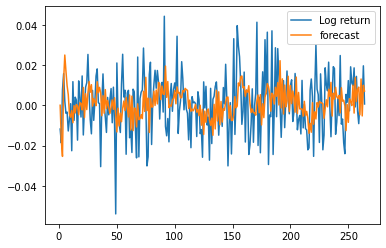

In [9]:
# SP500
# Order of differencing
result = adfuller(sp['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
diff = sp['Adj Close'].diff().dropna()
#plot_acf(diff)
#plot_pacf(diff)
#plt.show()
# Apply model: one autoregressive, one differencing, and one moving average
model = sm.tsa.arima.ARIMA(returns_sp, order=(2,2,10))
results = model.fit()
print(results.summary())
sp['forecast']=results.predict()
sp[['Log return','forecast']].plot()

the forcast line for the first 15 days is accuate, it fits with the origian log return line of SP500. however, after 15 days, the model becomes to forecast the average return of day t, t+1, which fail to perdict the future trend of the SP500 index. The main factor is the model selection, the selection of the appropriate ARIMA model parameters (p, d, q), this can be challenging and requires some level of expertise. Change different parameters can lead to inaccurate forecasts.

/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ADF Statistic: -3.16880996203009
p-value: 0.021862566961089774
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  265
Model:                ARIMA(1, 2, 11)   Log Likelihood                 665.385
Date:                Sat, 04 Mar 2023   AIC                          -1304.770
Time:                        12:38:12   BIC                          -1258.332
Sample:                             0   HQIC                         -1286.108
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7671      0.094     -8.196      0.000      -0.951      -0.584
ma.L1         -1.1688      0.595     -1.964      0.049      -2.335  

/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

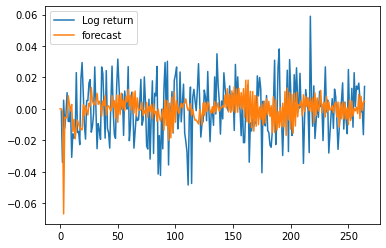

In [10]:
# Russell
# Order of differencing
result = adfuller(russell['Adj Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
diff = russell['Adj Close'].diff().dropna()
#plot_acf(diff)
#plot_pacf(diff)
#plt.show()
# Apply model: one autoregressive, one differencing, and one moving average
model = sm.tsa.arima.ARIMA(russell_log_ret, order=(1,2,11))
results = model.fit()
print(results.summary())
russell['forecast']=results.predict()
russell[['Log return','forecast']].plot()

The prediction of the Russell is not accuate, the reason might be lack of sufficient data, in the code is .diff(). ARIMA perdiction require a large amount of data to be effective. there might not be enough dataset to fully perdict the future trend and relationships in the return data. The change of the difference in (p, d, q) affect the plot a lot. The higher difference we enter, more deeper floating we got.

ADF Statistic: -0.1059868658490907
p-value: 0.94883894390481
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  435
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 675.025
Date:                Sat, 04 Mar 2023   AIC                          -1344.050
Time:                        12:38:12   BIC                          -1331.838
Sample:                             0   HQIC                         -1339.229
                                - 435                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5093      0.032    -15.792      0.000      -0.572      -0.446
ma.L1         -1.0000      6.478     -0.154      0.877     -13.696    

/Users/meixingzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

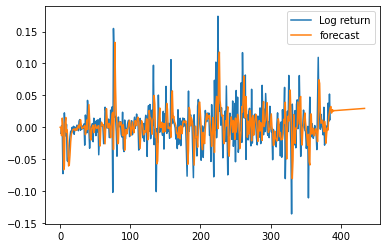

In [11]:
# Bitcoin
# Order of differencing
result = adfuller(bitcoin['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
diff = russell['Adj Close'].diff().dropna()
#plot_acf(diff)
#plot_pacf(diff)
#plt.show()
# Apply model: one autoregressive, one differencing, and one moving average
model = sm.tsa.arima.ARIMA(bitcoin_log_ret, order=(1,2,1))
results = model.fit()
print(results.summary())
bitcoin['forecast']=results.predict()
bitcoin[['Log return','forecast']].plot()

From the above plots we can see that we can perdict the return of Bitcoin successfully as we have enough data to create the forcast. As we do not have the Adj Close in Bitcoin trade, we use the close instead. we also predict the future trend of the bitcoin to be slightly increase in value. the risk-loving investor may increase their position at this time.

### B3:

In [12]:
# Set an initial investment level
initial_investment = 1000000
# Select our confidence interval
conf_level1, conf_level2, conf_level3 = 0.01, 0.05, 0.1
# Russell
print('Russell:')
cutoff1 = norm.ppf(conf_level1, (1+russell_log_ret.mean())*initial_investment, russell_log_ret.std()*initial_investment)
cutoff2 = norm.ppf(conf_level2, (1+russell_log_ret.mean())*initial_investment, russell_log_ret.std()*initial_investment)
cutoff3 = norm.ppf(conf_level3, (1+russell_log_ret.mean())*initial_investment, russell_log_ret.std()*initial_investment)
# VaR
var_1 = initial_investment - cutoff1
var_2 = initial_investment - cutoff2
var_3 = initial_investment - cutoff3
print('VaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_1)
print('VaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_2)
print('VaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_3)
cvar_1 = (1 / (1 - conf_level1)) * var_1
cvar_2 = (1 / (1 - conf_level2)) * var_2
cvar_3 = (1 / (1 - conf_level2)) * var_3
print('CVaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_1)
print('CVaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_2)
print('CVaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_3,'\n')

# sp500
print('SP500:')
sp_cutoff1 = norm.ppf(conf_level1, (1+sp_log_ret.mean())*initial_investment, sp_log_ret.std()*initial_investment)
sp_cutoff2 = norm.ppf(conf_level2, (1+sp_log_ret.mean())*initial_investment, sp_log_ret.std()*initial_investment)
sp_cutoff3 = norm.ppf(conf_level3, (1+sp_log_ret.mean())*initial_investment, sp_log_ret.std()*initial_investment)
# VaR
var_sp_1 = initial_investment - sp_cutoff1
var_sp_2 = initial_investment - sp_cutoff2
var_sp_3 = initial_investment - sp_cutoff3
print('VaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_sp_1)
print('VaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_sp_2)
print('VaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_sp_3)
cvar_sp_1 = (1 / (1 - conf_level1)) * var_sp_1
cvar_sp_2 = (1 / (1 - conf_level2)) * var_sp_2
cvar_sp_3 = (1 / (1 - conf_level2)) * var_sp_3
print('CVaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_sp_1)
print('CVaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_sp_2)
print('CVaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_sp_3,'\n')

# Bitcoin
print('Bitcoin:')
b_cutoff1 = norm.ppf(conf_level1, (1+bitcoin_log_ret.mean())*initial_investment, bitcoin_log_ret.std()*initial_investment)
b_cutoff2 = norm.ppf(conf_level2, (1+bitcoin_log_ret.mean())*initial_investment, bitcoin_log_ret.std()*initial_investment)
b_cutoff3 = norm.ppf(conf_level3, (1+bitcoin_log_ret.mean())*initial_investment, bitcoin_log_ret.std()*initial_investment)
# VaR
var_b_1 = initial_investment - b_cutoff1
var_b_2 = initial_investment - b_cutoff2
var_b_3 = initial_investment - b_cutoff3
print('VaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_b_1)
print('VaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_b_2)
print('VaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', var_b_3)
cvar_b_1 = (1 / (1 - conf_level1)) * var_b_1
cvar_b_2 = (1 / (1 - conf_level2)) * var_b_2
cvar_b_3 = (1 / (1 - conf_level2)) * var_b_3
print('CVaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_b_1)
print('CVaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_b_2)
print('CVaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than ', cvar_b_3,'\n')


Russell:
VaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than  41136.45592540654
VaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than  29288.24148217251
VaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than  22972.00220414216
CVaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than  41551.97568222883
CVaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than  30829.72787597106
CVaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than  24181.05495172859 

SP500:
VaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater than  34422.58118145226
VaR at 95% confidence, a portfolio of 1M USD will not exceed losses greater than  24142.5900453137
VaR at 90% confidence, a portfolio of 1M USD will not exceed losses greater than  18662.36480943754
CVaR at 99% confidence, a portfolio of 1M USD will not exceed losses greater tha

From the calculation, we can see that the market index VaR and CVaR is almost half of the risky investment Bitcoin, so for the risk aversion investors they should consider invest along with the market index such as Russell 2000 or SP500, provide more safty returns, even if its in the worst condition, the investor would 4% of the total investment. For the risk loving investors, they could try to invest in Bitcoin or other cryptocurrencies, which would makes a great profit or totally lose in short amount of time. Investors of Bitcoin usually borrow to buy, so they create very high leverage, requires a huge margin and hard to enter. I would not recommand to invest in Bitcoin as they are much more risky than the market index.

### C1:

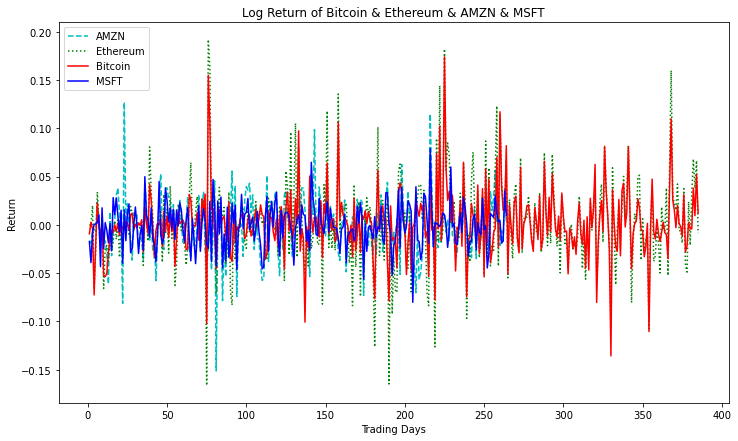

In [13]:
# Log return
ethereum = pd.read_csv("Ethereum.csv")
ethereum_log_ret = np.log(ethereum['Close']) - np.log(ethereum['Close'].shift(1))
ethereum['Log return'] = ethereum_log_ret
#print('Ethereum log return:',ethereum_log_ret.dropna().mean())
plt.figure(figsize=(12,7))
plt.plot(amzn['Log return'].dropna(), 'c', label ="AMZN", linestyle = "--")
plt.plot(ethereum_log_ret.dropna(), 'g', label ="Ethereum", linestyle = ":")
plt.plot(bitcoin_log_ret.dropna(), 'r', label ="Bitcoin")
plt.plot(msft['Log return'].dropna(), 'b', label ="MSFT", linestyle = "-")
plt.xlabel("Trading Days")
plt.ylabel("Return")
plt.title("Log Return of Bitcoin & Ethereum & AMZN & MSFT")
plt.legend()
plt.show()

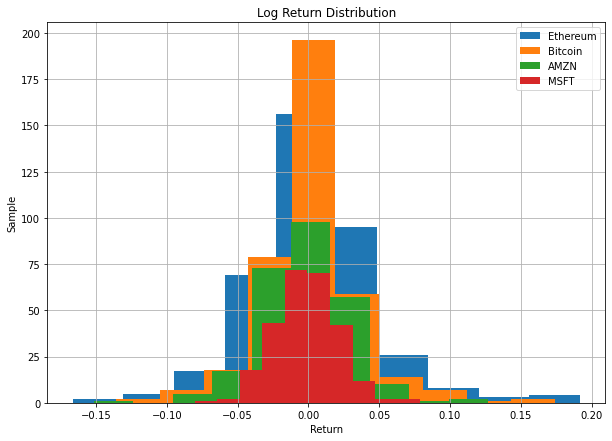

In [161]:
# Distribution
plt.figure(figsize=(10,7))
ethereum_log_ret.hist(label = 'Ethereum')
bitcoin_log_ret.hist(label = 'Bitcoin')
amzn['Log return'].hist(label = 'AMZN')
msft['Log return'].hist(label = 'MSFT')
plt.xlabel('Return')
plt.ylabel('Sample')
plt.title('Log Return Distribution')
plt.legend()
plt.show()

We can clearly see the difference between the market stocks and more risky cryptocurrencies investment objects, cryptocurrencies are higher return and higher risk option comparing to high tech companies. In term of this year, they are not highly returned. Investors can use cryptocurrencies to diversify an investment portfolio, as they are not directly correlated with traditional financial assets such as stocks and bonds, the weight of the cryptocurrencies should only contain a little pecentage of all the investments. people who invest in cryptocurrencies becasuse they are decentralized, meaning that government can not controlled it and its more likely not affect by the economic change. Most important, cryptocurrencies transactions are anonymous, which provides investors with a level of privacy, public are hard to know who is trying to control the market. The public index are more restricted and being mointered

### C2:

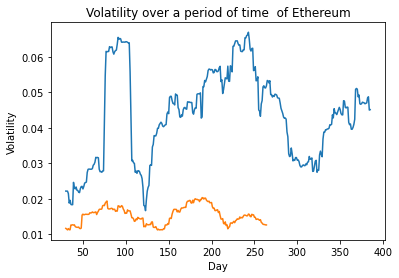

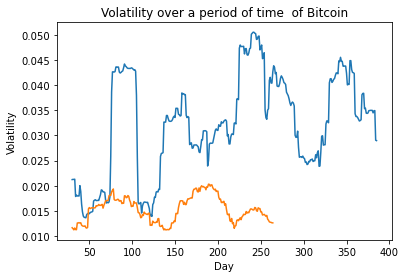

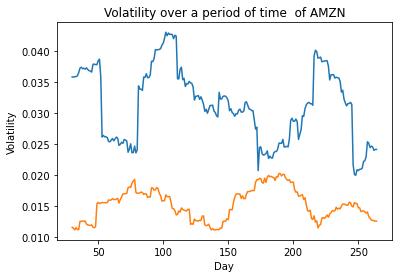

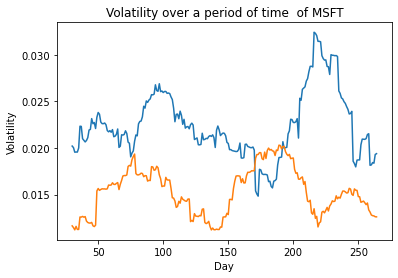

In [182]:
# Volatility
# Ethereum
ethereum_vol = ethereum_log_ret.rolling(window=30, min_periods=30).std()
sp500_vol = sp_log_ret.rolling(window=30, min_periods=30).std()
ethereum_vol.plot()
sp500_vol.plot()
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('Volatility over a period of time  of Ethereum')
plt.show()

# Bitcoin
bitcoin_vol = bitcoin_log_ret.rolling(window=30, min_periods=30).std()
sp500_vol = sp_log_ret.rolling(window=30, min_periods=30).std()
bitcoin_vol.plot()
sp500_vol.plot()
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('Volatility over a period of time  of Bitcoin')
plt.show()

# AMZN
amzn_vol = returns_amzn.rolling(window=30, min_periods=30).std()
sp500_vol = sp_log_ret.rolling(window=30, min_periods=30).std()
amzn_vol.plot()
sp500_vol.plot()
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('Volatility over a period of time  of AMZN')
plt.show()

# MSFT
msft_vol = returns_msft.rolling(window=30, min_periods=30).std()
sp500_vol = sp_log_ret.rolling(window=30, min_periods=30).std()
msft_vol.plot()
sp500_vol.plot()
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('Volatility over a period of time  of MSFT')
plt.show()

The yellow line in the above graph is SP500 market index line, the volatility of SP500 is lower than all of the four assets. We know that the higher volatility, the higher return, the higher risk. the stock AMZN and MSFT have relvent relationship with SP500 index and they increase as the market index increase, decrease as the market index decrease. However, compare to the volatility of cryptocurrencies, the volatility of the market index is very small. Cryptocurrencies has very high volatility as people are trading them very often, they have much higher return than the regular stocks. Also, from the graph the Cryptocurrencies has no relationship with the SP500 index.

### C3:

In [23]:
# AMZN
garch11_amzn = arch_model(returns_amzn*100, p=1, q=1)
res_amzn = garch11_amzn.fit(update_freq=10)
print(res_amzn.summary())

Iteration:     10,   Func. Count:     56,   Neg. LLF: 670.2935243317754
Optimization terminated successfully    (Exit mode 0)
            Current function value: 670.2935232452118
            Iterations: 12
            Function evaluations: 65
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -670.294
Distribution:                  Normal   AIC:                           1348.59
Method:            Maximum Likelihood   BIC:                           1362.89
                                        No. Observations:                  264
Date:                Sat, Mar 04 2023   Df Residuals:                      263
Time:                        14:12:14   Df Model:                            1
        

In [18]:
# MSFT
garch11_msft = arch_model(returns_msft*100, p=1, q=1)
res_msft = garch11_msft.fit(update_freq=10)
print(res_msft.summary())

Iteration:     10,   Func. Count:     60,   Neg. LLF: 584.7436060589457
Optimization terminated successfully    (Exit mode 0)
            Current function value: 584.701071181741
            Iterations: 15
            Function evaluations: 85
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -584.701
Distribution:                  Normal   AIC:                           1177.40
Method:            Maximum Likelihood   BIC:                           1191.71
                                        No. Observations:                  264
Date:                Sat, Mar 04 2023   Df Residuals:                      263
Time:                        12:40:09   Df Model:                            1
         

Omega + Alpha * r + Beta * var shows overall measurement of persistence of volatility. From the above two summary, the GARCH coefficient value of stock AMZN and MSFT are both greater than 1, then we can conclude that the volatility is highly persistent and clustering. The coefficient is positive and statistically significant indicating the presence of leverage effect in the series

### C4:

In [20]:
# Bitcoin
garch11_bitcoin = arch_model(bitcoin_log_ret.dropna()*100, p=1, q=1)
res_bitcoin = garch11_bitcoin.fit(update_freq=10)
print(res_bitcoin.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 996.5788368135442
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -996.579
Distribution:                  Normal   AIC:                           2001.16
Method:            Maximum Likelihood   BIC:                           2016.97
                                        No. Observations:                  385
Date:                Sat, Mar 04 2023   Df Residuals:                      384
Time:                        12:45:05   Df Model:                            1
                               Mean Model                               
         

In [21]:
# Ethereum
garch11_ethereum = arch_model(ethereum_log_ret.dropna()*100, p=1, q=1)
res_ethereum = garch11_ethereum.fit(update_freq=10)
print(res_ethereum.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1109.6206791839165
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1109.62
Distribution:                  Normal   AIC:                           2227.24
Method:            Maximum Likelihood   BIC:                           2243.05
                                        No. Observations:                  385
Date:                Sat, Mar 04 2023   Df Residuals:                      384
Time:                        12:45:48   Df Model:                            1
                               Mean Model                               
        

The GARCH coefficient value of Cryptocurrencies Bitcoin and Ethereum are relvently larger which indicate that the volatility is high in trading cryptocurrencies, the GARCH coefficients estimated for cryptocurrencies may be subject to greater uncertainty, as they are relatively new and still evolving rapidly. As we see, the data of the Bitcoin and Ethereum are unstable becasue the high volatility of many cryptocurrencies can make accurately estimating GARCH coefficients more challenging. GARCH coefficient of stock AMZN and MSFT is in range of 0 to 1, we estimate reliable coefficient even though many of data ponits are outside of stock log likelihood range. However, the log-likelihood and AIC have oppsiite sign, it might be the reason that the effective sample size is still long and sometimes unstable, to solve that we could increase our sample size.